In [1]:
import pandas as pd 
import sklearn
import seaborn as sea
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

## Load in the data

In [2]:
house_prices_train = pd.read_csv('train.csv')
house_prices_test = pd.read_csv('test.csv')
house_prices_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
house_prices_train.shape, house_prices_test.shape

((1460, 81), (1459, 80))

In [4]:
train = pd.read_csv('train_engineered2_poly.csv')
test = pd.read_csv('test_engineered2_poly.csv')
output = pd.read_csv('output_engineered2_poly.csv', header=None)

In [5]:
train.head(2)

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF**2,OpenPorchSF**2,EnclosedPorch**2,3SsnPorch**2,ScreenPorch**2,PoolArea**2,MiscFeature_Gar2**2,MiscFeature_Othr**2,MiscFeature_Shed**2,MiscFeature_TenC**2
0,0,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.000000,17.033238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,32.495057,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test.head(2)

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF**2,OpenPorchSF**2,EnclosedPorch**2,3SsnPorch**2,ScreenPorch**2,PoolArea**2,MiscFeature_Gar2**2,MiscFeature_Othr**2,MiscFeature_Shed**2,MiscFeature_TenC**2
0,0,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,24.490224,0.000000,0.0,0.0,22.999607,0.0,0.000000,0.0,0.0,0.0
1,1,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,35.716770,13.038728,0.0,0.0,0.000000,0.0,88.992128,0.0,0.0,0.0


In [7]:
train.drop("Unnamed: 0", axis=1, inplace=True)
test.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
train.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF**2,OpenPorchSF**2,EnclosedPorch**2,3SsnPorch**2,ScreenPorch**2,PoolArea**2,MiscFeature_Gar2**2,MiscFeature_Othr**2,MiscFeature_Shed**2,MiscFeature_TenC**2
0,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,5.017280,...,0.000000,17.033238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,5.652489,...,32.495057,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF**2,OpenPorchSF**2,EnclosedPorch**2,3SsnPorch**2,ScreenPorch**2,PoolArea**2,MiscFeature_Gar2**2,MiscFeature_Othr**2,MiscFeature_Shed**2,MiscFeature_TenC**2
0,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,5.602119,...,24.490224,0.000000,0.0,0.0,22.999607,0.0,0.000000,0.0,0.0,0.0
1,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,6.008813,...,35.716770,13.038728,0.0,0.0,0.000000,0.0,88.992128,0.0,0.0,0.0


In [10]:
output.head(5)

,0,1
0,NaN,log_SalePrice
1,0.0,12.2476991164
2,1.0,12.1090164423
3,2.0,12.3171711673
4,3.0,11.8494048444


In [11]:
output.drop(0, axis=1, inplace=True)
output.rename(columns={1: "log_SalePrice"}, inplace=True)
output.drop(0,axis=0,inplace=True)
output.head(2)
print train.shape, test.shape, output.shape

(1434, 325) (1459, 325) (1434, 1)


In [12]:
output.head(5)

,log_SalePrice
1,12.2476991164
2,12.1090164423
3,12.3171711673
4,11.8494048444
5,12.4292201968


## ExtraTreesRegressor

In [13]:
#Import libraries:
from sklearn.ensemble import ExtraTreesRegressor  #GBM algorithm
from sklearn import model_selection, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search
from sklearn.grid_search import RandomizedSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

### Function to fit model and do Cross Validation for error calculation

In [14]:
def modelfit(model, dtrain, features, output, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    model.fit(dtrain[features], output)
        
    #Predict training set:
    dtrain_predictions = model.predict(dtrain[features])
    #dtrain_predprob = model.predict_proba(dtrain[features])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = model_selection.cross_val_score(model, dtrain[features], output, cv=cv_folds)
    
    #Print model report:
    print "\nModel Report"
    print "R-Square: %.3f" % metrics.r2_score(output, dtrain_predictions)
    print "RMSE : %.3f" % np.sqrt(metrics.mean_squared_error(output, dtrain_predictions))
    print"cv_score: "
    print(cv_score)

    if performCV:
        print "CV Score : Mean: %.7g | Std: %.7g | Min: %.7g | Max: %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(model.feature_importances_[0:30], features[0:30]).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Top 30 Feature Importances')
        plt.ylabel('Features Importance Score')

### Baseline Model

(1434, 325) (1434, 1)

Model Report
R-Square: 1.000
RMSE : 0.000
cv_score: 
[ 0.87706385  0.87559537  0.83663131  0.88428036  0.85758818]
CV Score : Mean: 0.8662318 | Std: 0.0172143 | Min: 0.8366313 | Max: 0.8842804


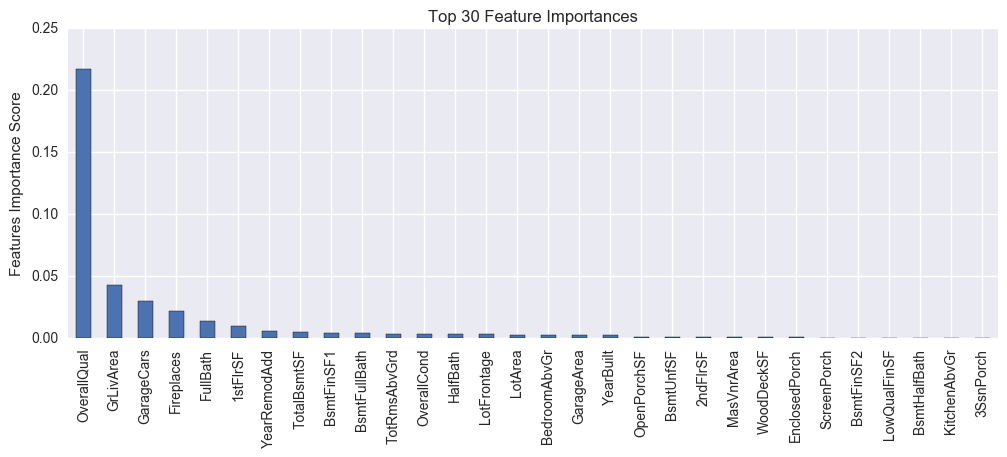

In [15]:
#features = [x for x in train.columns if x not in ['SalePrice', 'log_SalePrice']]
features = train.columns
print train[features].shape, output.shape
#print output
trees = ExtraTreesRegressor(random_state=84)
modelfit(trees, train, features, output, performCV=True, printFeatureImportance=True)

Mean CV score is 0.8662318 and we should be able to do better so lets keep going! Also, it looks like it is overfitting to the training set looking at RMSE and R-Square.

### Parameter Tuning

In [20]:
param_test1 = {'n_estimators': range(20,350,10)}
gsearch1 = GridSearchCV(estimator = ExtraTreesRegressor(random_state=77), 
                                                        param_grid = param_test1, 
                                                        n_jobs=4,
                                                        iid=False,
                                                        cv=5)
gsearch1.fit(train[features], output)

GridSearchCV(cv=5, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=77,
          verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [21]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.87553, std: 0.01812, params: {'n_estimators': 20},
  mean: 0.87641, std: 0.02115, params: {'n_estimators': 30},
  mean: 0.87974, std: 0.02045, params: {'n_estimators': 40},
  mean: 0.88039, std: 0.02037, params: {'n_estimators': 50},
  mean: 0.88097, std: 0.02055, params: {'n_estimators': 60},
  mean: 0.88161, std: 0.02131, params: {'n_estimators': 70},
  mean: 0.88149, std: 0.02213, params: {'n_estimators': 80},
  mean: 0.88155, std: 0.02199, params: {'n_estimators': 90},
  mean: 0.88191, std: 0.02203, params: {'n_estimators': 100},
  mean: 0.88233, std: 0.02179, params: {'n_estimators': 110},
  mean: 0.88213, std: 0.02208, params: {'n_estimators': 120},
  mean: 0.88239, std: 0.02168, params: {'n_estimators': 130},
  mean: 0.88230, std: 0.02174, params: {'n_estimators': 140},
  mean: 0.88214, std: 0.02204, params: {'n_estimators': 150},
  mean: 0.88219, std: 0.02225, params: {'n_estimators': 160},
  mean: 0.88233, std: 0.02198, params: {'n_estimators': 170},
  mean: 0.88247,

### Tuning tree-specific parameters

Now lets move onto tuning the tree parameters. I plan to do this in following stages:

Tune max_depth and num_samples_split
Tune min_samples_leaf
Tune max_features

In [22]:
gsearch1.best_params_

{'n_estimators': 330}

In [25]:
param_test2 = {'max_depth': range(8,20,1), 'min_samples_split': np.arange(0.001, 0.011, 0.005)}
gsearch2 = GridSearchCV(estimator = ExtraTreesRegressor(n_estimators=gsearch1.best_params_['n_estimators'],
                                                        random_state=77), 
                                                        param_grid = param_test2, 
                                                        n_jobs=4,
                                                        iid=False,
                                                        cv=5)
gsearch2.fit(train[features],output)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.87226, std: 0.02004, params: {'min_samples_split': 0.001, 'max_depth': 8},
  mean: 0.87117, std: 0.02083, params: {'min_samples_split': 0.0060000000000000001, 'max_depth': 8},
  mean: 0.87698, std: 0.02023, params: {'min_samples_split': 0.001, 'max_depth': 9},
  mean: 0.87484, std: 0.02151, params: {'min_samples_split': 0.0060000000000000001, 'max_depth': 9},
  mean: 0.87935, std: 0.02117, params: {'min_samples_split': 0.001, 'max_depth': 10},
  mean: 0.87923, std: 0.02141, params: {'min_samples_split': 0.0060000000000000001, 'max_depth': 10},
  mean: 0.88152, std: 0.02083, params: {'min_samples_split': 0.001, 'max_depth': 11},
  mean: 0.88036, std: 0.02106, params: {'min_samples_split': 0.0060000000000000001, 'max_depth': 11},
  mean: 0.88327, std: 0.02121, params: {'min_samples_split': 0.001, 'max_depth': 12},
  mean: 0.88171, std: 0.02221, params: {'min_samples_split': 0.0060000000000000001, 'max_depth': 12},
  mean: 0.88405, std: 0.02192, params: {'min_samples_split': 0.0

In [27]:
min_samples_split = gsearch2.best_params_['min_samples_split'] 
max_depth = gsearch2.best_params_['max_depth']
n_estimators=gsearch1.best_params_['n_estimators'] 

In [28]:
print min_samples_split, max_depth, n_estimators

0.001 16 330


In [31]:
param_test3 = {'min_samples_leaf':range(1,20,5), 'max_features':range(20,40,2)}
gsearch3 = GridSearchCV(estimator = ExtraTreesRegressor(min_samples_split=min_samples_split,
                                                        max_depth=max_depth,
                                                        n_estimators=n_estimators,
                                                        random_state=77), 
                                                        param_grid = param_test3, 
                                                        n_jobs=4,
                                                        iid=False,
                                                        cv=5)
gsearch3.fit(train[features], output)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.87349, std: 0.01734, params: {'max_features': 20, 'min_samples_leaf': 1},
  mean: 0.83967, std: 0.02249, params: {'max_features': 20, 'min_samples_leaf': 6},
  mean: 0.81362, std: 0.02381, params: {'max_features': 20, 'min_samples_leaf': 11},
  mean: 0.79391, std: 0.02378, params: {'max_features': 20, 'min_samples_leaf': 16},
  mean: 0.87475, std: 0.01713, params: {'max_features': 22, 'min_samples_leaf': 1},
  mean: 0.84389, std: 0.02123, params: {'max_features': 22, 'min_samples_leaf': 6},
  mean: 0.81853, std: 0.02283, params: {'max_features': 22, 'min_samples_leaf': 11},
  mean: 0.79921, std: 0.02319, params: {'max_features': 22, 'min_samples_leaf': 16},
  mean: 0.87627, std: 0.01876, params: {'max_features': 24, 'min_samples_leaf': 1},
  mean: 0.84729, std: 0.02201, params: {'max_features': 24, 'min_samples_leaf': 6},
  mean: 0.82393, std: 0.02368, params: {'max_features': 24, 'min_samples_leaf': 11},
  mean: 0.80516, std: 0.02392, params: {'max_features': 24, 'min_sample

In [32]:
gsearch3.best_params_['min_samples_leaf']

1

In [33]:
param_test4 = {'max_features':range(30,100,2)}
gsearch4 = GridSearchCV(estimator = ExtraTreesRegressor(min_samples_split=min_samples_split,
                                                        max_depth=max_depth,
                                                        n_estimators=n_estimators,
                                                        min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],
                                                        random_state=77), 
                                                        param_grid = param_test4, 
                                                        n_jobs=4,
                                                        iid=False,
                                                        cv=5)
gsearch4.fit(train[features], output)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.87898, std: 0.01745, params: {'max_features': 30},
  mean: 0.88048, std: 0.01811, params: {'max_features': 32},
  mean: 0.87917, std: 0.01891, params: {'max_features': 34},
  mean: 0.88141, std: 0.01850, params: {'max_features': 36},
  mean: 0.88212, std: 0.01877, params: {'max_features': 38},
  mean: 0.88227, std: 0.01902, params: {'max_features': 40},
  mean: 0.88311, std: 0.01872, params: {'max_features': 42},
  mean: 0.88312, std: 0.01810, params: {'max_features': 44},
  mean: 0.88399, std: 0.01818, params: {'max_features': 46},
  mean: 0.88298, std: 0.01824, params: {'max_features': 48},
  mean: 0.88321, std: 0.01861, params: {'max_features': 50},
  mean: 0.88385, std: 0.01769, params: {'max_features': 52},
  mean: 0.88398, std: 0.01800, params: {'max_features': 54},
  mean: 0.88478, std: 0.01860, params: {'max_features': 56},
  mean: 0.88376, std: 0.01824, params: {'max_features': 58},
  mean: 0.88522, std: 0.01796, params: {'max_features': 60},
  mean: 0.88528, std: 0.

#### Optimum parameters so far: 

In [34]:
min_samples_split = gsearch2.best_params_['min_samples_split'] 
min_samples_leaf = gsearch3.best_params_['min_samples_leaf'] 
max_depth = gsearch2.best_params_['max_depth']
max_features = gsearch4.best_params_['max_features']
n_estimators=gsearch1.best_params_['n_estimators']

In [36]:
gsearch4.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=16,
          max_features=78, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=0.001,
          min_weight_fraction_leaf=0.0, n_estimators=330, n_jobs=1,
          oob_score=False, random_state=77, verbose=0, warm_start=False)


Model Report
R-Square: 0.999
RMSE : 0.011
cv_score: 
[ 0.90292195  0.89558214  0.85332959  0.90169518  0.88195991]
CV Score : Mean: 0.8870978 | Std: 0.0184508 | Min: 0.8533296 | Max: 0.902922


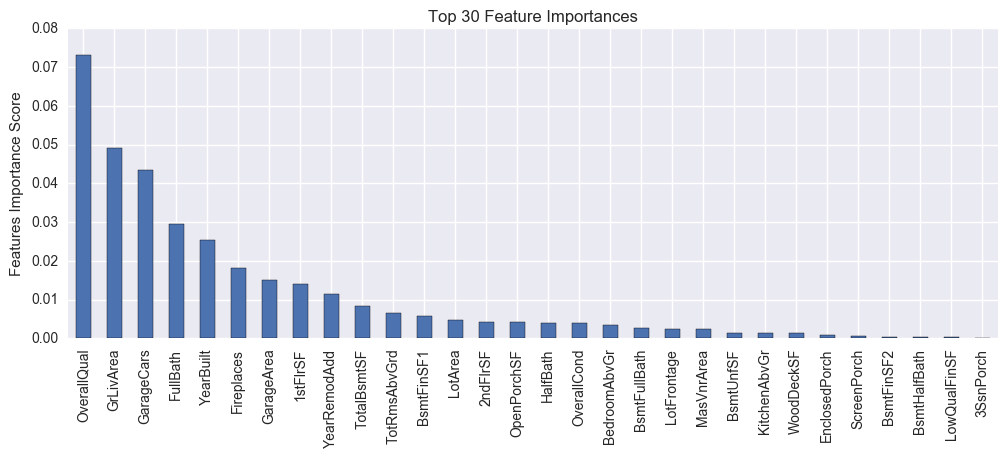

In [37]:
modelfit(gsearch4.best_estimator_, train, features, output)

If you compare the feature importance of this model with the baseline model, you’ll find that now we are able to derive value from many more variables.

In [41]:
print("min_samples_split = %f") %min_samples_split 
print("min_samples_leaf = %d") %min_samples_leaf
print("max_depth = %d") %max_depth 
print("max_features = %d") %max_features 
print("n_estimators = %d") %n_estimators

min_samples_split = 0.001000
min_samples_leaf = 1
max_depth = 16
max_features = 78
n_estimators = 330
